# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [1]:
import os
import glob
import pandas as pd
os.chdir("/Users/akoga/Documents/Ustacky/Project/Data-Analysis-Project") #Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [3]:
extension = 'csv'
csv_files = [i for i in glob.glob('*.{}'.format(extension))]
csv_files

['Abuja_Branch.csv', 'Lagos_Branch.csv', 'Port_Harcourt_Branch.csv']

#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [4]:
# Combine all csv's in csv_files
combined_csv = pd.concat([pd.read_csv(file) for file in csv_files])

#Export to csv
combined_csv.to_csv( "combined_file.csv", index=False, encoding='utf-8-sig')

#### To-Do -Read the CSV file using `pd.read_csv` method

In [8]:
combined_df = pd.read_csv('combined_file.csv')

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [9]:
combined_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [12]:
combined_df.shape

(1000, 17)

#### To-Do - Generate the names of the columns using the columns attribute.

In [15]:
combined_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [20]:
combined_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.220360e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

From the data statistical summary above, we can easily see that for each of the columns with numerical values in the combined dataframe, key information on average, maximum, minimum, total count, etc are returned.

We could easily see that across the 3 supermarket locations, there are 1000 customer entries, an average customer satisfaction rating of 6.9, with a minimum rating of 4.0, average unit price of a product is 20041.96, maximum quanitity of a product sold is 10, 50th percentile for COGS is 87033.6 and a minimum gross income across the 3 stores for a particular product is 183.06, etc.

These give a quick overview of the performance of all the supermarkets put together.

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [23]:
combined_df.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
combined_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### Findings
The above method shows that there are NO missing data occurence in the combined dataset

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [27]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [29]:
combined_df["Date"]= pd.to_datetime(combined_df["Date"])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [31]:
print(combined_df['Date'].dtypes)

datetime64[ns]


In [32]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

#### To-Do - Repeat the two steps above to the `time` column

In [67]:
combined_df['Time'] = pd.to_datetime(combined_df['Time'])

In [68]:
print(combined_df['Time'].dtypes)

datetime64[ns]


In [72]:
combined_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,1900-01-01 13:27:00,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,1900-01-01 18:07:00,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,1900-01-01 17:03:00,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,2019-01-15,1900-01-01 16:19:00,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,2019-03-11,1900-01-01 15:30:00,Epay,29016.0,4.761905,1450.80,4.4


## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [74]:
combined_df['Day'] = combined_df['Date'].dt.day

In [77]:
combined_df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,1900-01-01 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,1900-01-01 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6


#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [78]:
combined_df['Month'] = combined_df['Date'].dt.month

In [79]:
combined_df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,1900-01-01 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,1900-01-01 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2


#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [80]:
combined_df['Year'] = combined_df['Date'].dt.year

In [81]:
combined_df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,1900-01-01 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,1900-01-01 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019


#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [82]:
combined_df['Hour'] = combined_df['Time'].dt.hour

In [83]:
combined_df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,1900-01-01 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,1900-01-01 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18


#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [84]:
combined_df['Hour'].nunique()

11

In [85]:
combined_df['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [87]:
#Uncomment the code and Run it
categorical_columns = [col for col in combined_df.columns if combined_df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [88]:
#Example - Uncomment the Code and Run it
combined_df['Branch'].unique().tolist()

['B', 'A', 'C']

In [89]:
print("Total Number of unique values in the Branch Column : {}". format(len(combined_df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [91]:
for col in categorical_columns:
    if col != 'Branch':
        print(combined_df[col].unique().tolist())
        print("Total Number of unique values in the {} Column : {}". format(col, len(combined_df[col].unique().tolist())))

['692-92-5582', '351-62-0822', '529-56-3974', '299-46-1805', '319-50-3348', '371-85-5789', '273-16-6619', '649-29-6775', '145-94-9061', '871-79-8483', '149-71-6266', '640-49-2076', '777-82-7220', '280-35-5823', '354-25-5821', '132-32-9879', '370-41-7321', '727-46-3608', '669-54-1719', '616-24-2851', '242-55-6721', '347-34-2234', '853-23-2453', '109-28-2512', '510-95-6347', '847-38-7188', '318-68-5053', '152-08-9985', '766-85-7061', '733-01-9107', '716-39-1409', '479-26-8945', '227-78-1148', '291-32-1427', '659-65-8956', '378-24-2715', '219-22-9386', '268-27-6179', '549-84-7482', '191-10-6171', '695-51-0018', '590-83-4591', '241-72-9525', '262-47-2794', '608-96-3517', '279-74-2924', '307-85-2293', '743-04-1105', '423-57-2993', '548-46-9322', '505-02-0892', '316-55-4634', '608-27-6295', '414-12-7047', '895-66-0685', '305-14-0245', '732-04-5373', '284-34-9626', '437-58-8131', '641-43-2399', '542-41-0513', '875-46-5808', '394-43-4238', '573-58-9734', '817-69-8206', '142-63-6033', '656-16-1

#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [94]:
combined_df['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [ ]:
combined_df['Branch'].value_counts()

In [95]:
combined_df['Invoice ID'].value_counts()

775-72-1988    1
852-62-7105    1
509-29-3912    1
339-12-4827    1
458-10-8612    1
              ..
795-49-7276    1
848-07-1692    1
895-66-0685    1
273-16-6619    1
674-56-6360    1
Name: Invoice ID, Length: 1000, dtype: int64

In [96]:
combined_df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [97]:
combined_df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [98]:
combined_df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [99]:
combined_df['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [101]:
cities = combined_df.groupby('City')

In [103]:
cities.groups

{'Abuja': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'Lagos': [332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, ...], 'Port Harcourt': [672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683,

In [258]:
combined_df.loc[900]

Invoice ID                         266-20-6657
Branch                                       C
City                             Port Harcourt
Customer type                           Member
Gender                                    Male
Product line                Food and beverages
Unit price                             19814.4
Quantity                                     7
Tax 5%                                 6935.04
Total                                   145636
Date                       2019-03-12 00:00:00
Time                       1900-01-01 19:39:00
Payment                                   Epay
cogs                                    138701
gross margin percentage                 4.7619
gross income                           6935.04
Rating                                     5.2
Day                                         12
Month                                        3
Year                                      2019
Hour                                        19
Name: 900, dt

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [115]:
city_obj = cities.agg({'gross income':['sum', 'mean']})
city_obj

gross income             
                       sum         mean
City                                   
Abuja           1820531.52  5483.528675
Lagos           1820577.78  5354.640529
Port Harcourt   1895463.54  5778.852256

In [116]:
city_obj['gross income']['sum'].max()

1895463.539999999

In [149]:
maxgross_city = city_obj.loc[city_obj['gross income']['sum'] == city_obj['gross income']['sum'].max(), 'gross income'].index.tolist()[0]
maxgross_city

'Port Harcourt'

In [150]:
print('The city with the highest total gross income: {}'.format(maxgross_city))

The city with the highest total gross income: Port Harcourt


In [163]:
abuja_df = combined_df[combined_df['City'] == 'Abuja']
phc_df = combined_df[combined_df['City'] == 'Port Harcourt']
lagos_df = combined_df[combined_df['City'] == 'Lagos']

In [195]:
phc_time = phc_df['Hour'].value_counts().to_frame().iloc[0].name

In [196]:
abuja_time = abuja_df['Hour'].value_counts().to_frame().iloc[0].name

In [197]:
lagos_time = lagos_df['Hour'].value_counts().to_frame().iloc[0].name

In [203]:
city_list = {'Port-Harcourt': phc_time, 'Abuja': abuja_time, 'Lagos': lagos_time}

for city in city_list:
    print('The time of day with most shopping payments in {} is the {}th hour.'.format(city, city_list[city]))


The time of day with most shopping payments in Port-Harcourt is the 10th hour.
The time of day with most shopping payments in Abuja is the 19th hour.
The time of day with most shopping payments in Lagos is the 10th hour.


In [217]:
city_rating = cities.agg({'Rating':'mean'})
city_rating.reset_index()

,City,Rating
0,Abuja,6.818072
1,Lagos,7.027059
2,Port Harcourt,7.072866


In [234]:
city_rating.reset_index()['Rating'].max()

7.072865853658538

In [241]:
max_rate = city_rating.loc[city_rating['Rating'] == city_rating.reset_index()['Rating'].max(), 'Rating'].index.tolist()[0]
max_rate

'Port Harcourt'

In [273]:
print('The city with the highest Customer Satisfaction rating on average on their overall shopping experience is {}.'.format(max_rate))

The city with the highest Customer Satisfaction rating on average on their overall shopping experience is Port Harcourt.


In [231]:
city_qty = cities.agg({'Quantity':'sum'})
city_qty.reset_index()

,City,Quantity
0,Abuja,1820
1,Lagos,1859
2,Port Harcourt,1831


In [235]:
city_qty.reset_index()['Quantity'].max()

1859

In [244]:
max_qty = city_qty.loc[city_qty['Quantity'] == city_qty.reset_index()['Quantity'].max(), 'Quantity'].index.tolist()[0]
max_qty

'Lagos'

In [245]:
print('The city with the highest Total Quantity of Purchases is {}.'.format(max_qty))

The city with the highest Total Quantity of Purchases is Lagos.


## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

Text(0.5, 1.0, 'Sales Record')

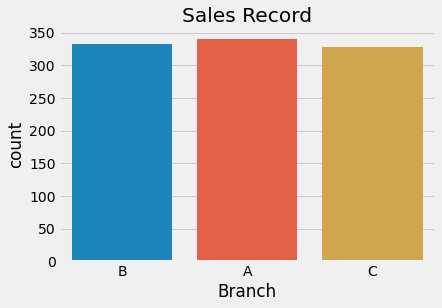

In [253]:
ax = sns.countplot(x="Branch", data=combined_df)
ax.set_title('Sales Record')

Branch A, which corresponds to Lagos has the highest sales record.

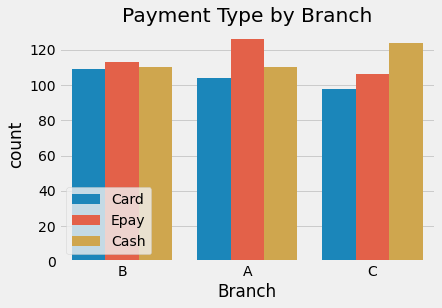

In [260]:
ax = sns.countplot(x="Branch", hue='Payment', data=combined_df)
ax.set_title('Payment Type by Branch')
plt.legend(loc='lower left')

Epay ranks as the most used form of payment in Branch A and Branch B, while Cash payment tops the charts for Branch C.

#### Explore a countplot for the `Payment` and `City` Column

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

Text(0.5, 1.0, 'Product Line Sold')

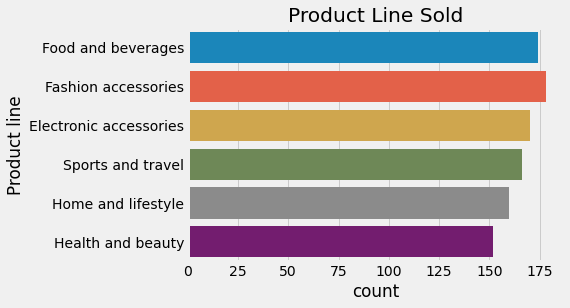

In [263]:
ax = sns.countplot(y="Product line", data=combined_df)
ax.set_title('Product Line Sold')

The **Fashion accessories** product line registered the highest number of sales, while the **Health and beauty** line was the least sold across the Branches.

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

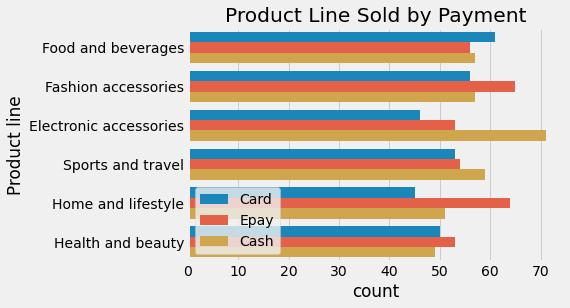

In [267]:
ax = sns.countplot(y="Product line", hue='Payment', data=combined_df)
ax.set_title('Product Line Sold by Payment')
plt.legend(loc='lower left')

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

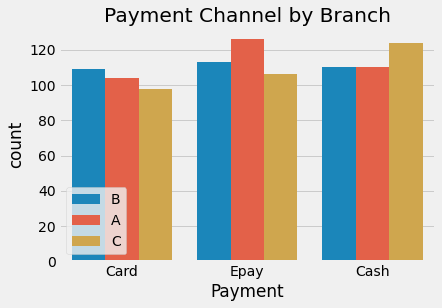

In [269]:
ax = sns.countplot(x="Payment", hue='Branch', data=combined_df)
ax.set_title('Payment Channel by Branch')
plt.legend(loc='lower left')

#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

Text(0.5, 1.0, 'Branch Rating')

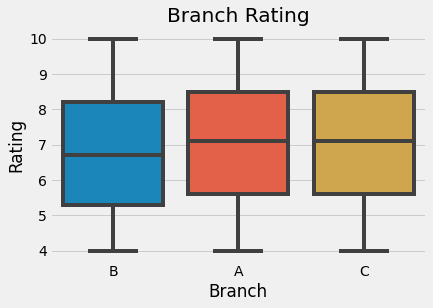

In [272]:
ax = sns.boxplot(x='Branch', y='Rating', data=combined_df)
ax.set_title('Branch Rating')

The branch with the lowest rating is Branch B, which corresponds to the city of Abuja

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

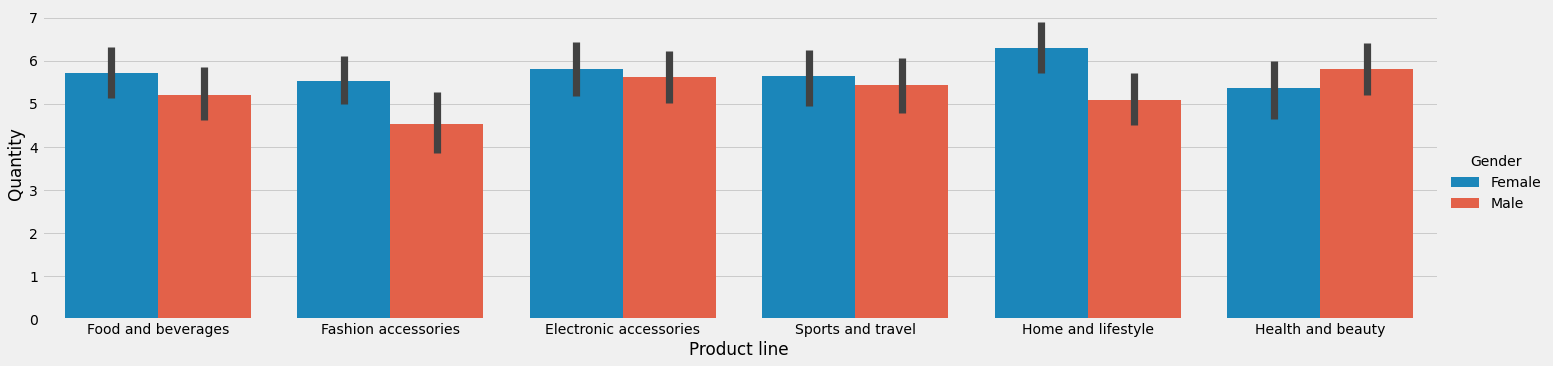

In [283]:
ax = sns.catplot(x='Product line', y='Quantity', hue='Gender', data=combined_df, kind="bar", aspect=4)

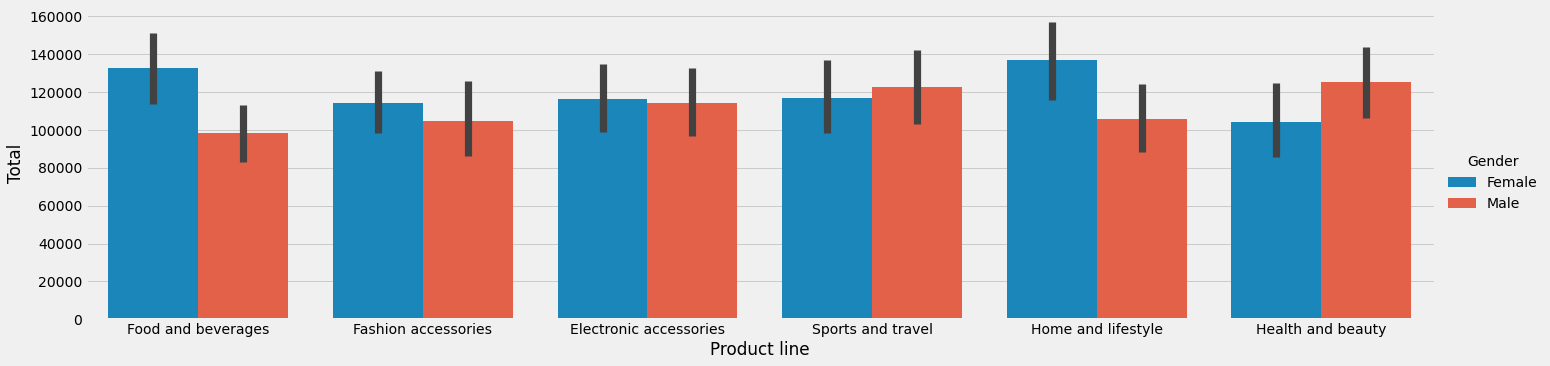

In [284]:
ax = sns.catplot(x='Product line', y='Total', hue='Gender', data=combined_df, kind="bar", aspect=4)

#### Insights

* Across the Branches, females purchased more of the all the available Product line except for **Health and beauty**, than males.
* Although the analysis shows that Males spent more money than Females in the **Sports and travel** Product line, even though Females purchased more in quantity.
* Males also spent more money in the **Health and beauty** Product line, and purchased more quantities than Females here as well.


#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

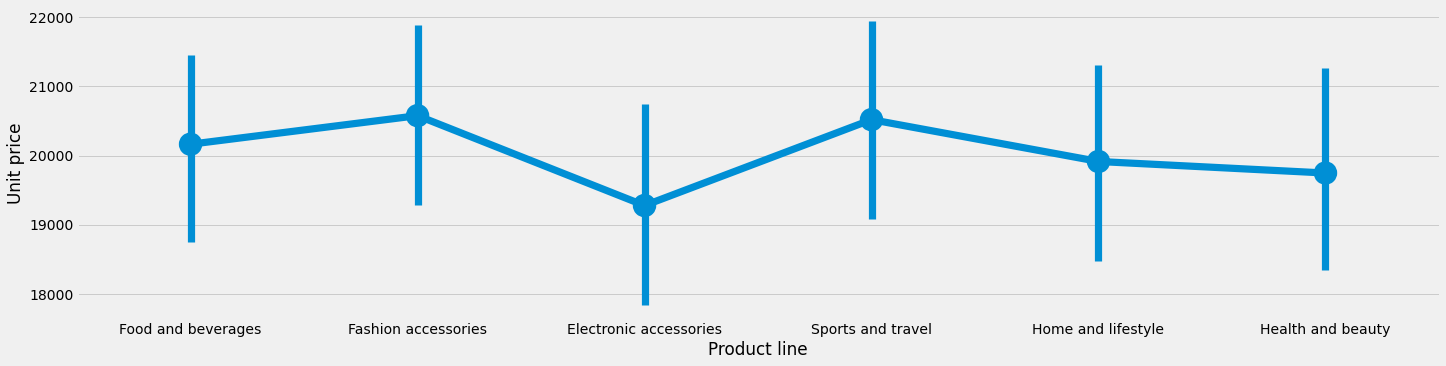

In [287]:
ax = sns.catplot(x='Product line', y='Unit price', data=combined_df, kind="point", aspect=4)

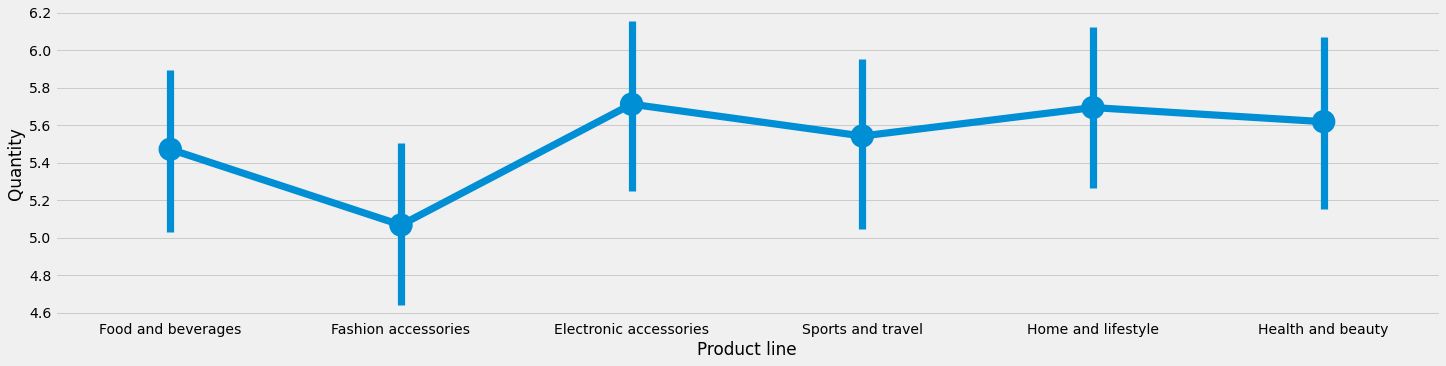

In [288]:
ax = sns.catplot(x='Product line', y='Quantity', data=combined_df, kind="point", aspect=4)

#### Insights

* The most expensive product by unit price is the **Fashion accessories** line, which registers the least patronage from customers across all the product lines.
* Though the **Sports and travel** product line is one of the most expensive products, customers patronage is not as low when compared to the **Fashion accessories** product line. This could mean that customers value **Sports and travel** more than they do **Fashion accessories**.
* The cheapest product by unit price is **Electronic accessories** which shows a corresponding high patronage by Quantity.

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


#### To-Do -  Explore the interaction between Customer type and Quantity of Product line purchased. To achieve this: 
* Use the `catplot()` to plot `Product line`, and `Quantity` purchased. Set the kind parameter to `box`, and set the hue to `Gender`. 
* The insights are summarized in the cell below the plot

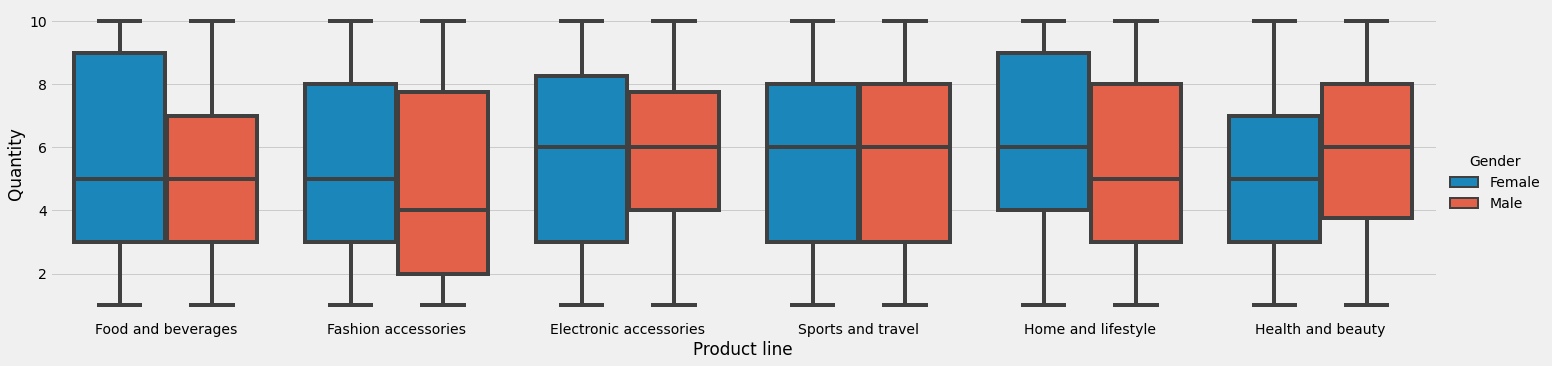

In [301]:
ax = sns.catplot(x='Product line', y='Quantity', hue='Gender', kind="box", data=combined_df, aspect=4)

#### Insights

The average quantity purchased by either male or female is the same for the following Product lines:
    * Food and beverages
    * Electronic accessories
    * Sports and travel

The average quantity purchased by Female is more than that purchased by their male counterpart for the following Product lines:
    * Fashion accessories
    * Home and lifestyle
    
The average quantity purchased by Male is more than that purchased by their female counterpart in the Health and beauty Product line.

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 